In [1]:
from IPython.display import HTML
import matplotlib
import math
import numpy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
import csv
from scipy import interpolate
import scipy.optimize
from functools import partial
from IPython.display import Latex
from fresnel import *

In [2]:
###############################################
#  Ignorar. CSS para centrar plots de Python  #
###############################################
display(HTML(''' 
<style>  
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
        }
        
    .table {
    
    }
    tr:hover {background-color: #f5f5f5;}
    td{text-align:center;}
</style>'''));

<h1>La óptica del Arcoiris</h1>

<h3>Gota esférica sin dispersión </h3>

En esta primera aproximación consideraremos el sistema formado por una gota esférica en la que los rayos solares inciden paralelos a la horizontal y en la cual no considreamos variación del índice de refracción con la longitud de onda (es decir no tendremos en cuenta el fenomeno de dispersión).

El sistema en cuestión es el presentado en la figura siguiente:<img src="rayos11.png">

<br>
Las líneas amarillas representan el haz luminoso, mientras que las verdes corresponden con las normales a la superficie de la gota. El ángulo $\alpha$, es el ángulo de incidencia que forma el haz luminoso con la normal, mientras que $\beta$ corresponde con el ángulo de refracción. Este último ángulo puede ser calculado de manera inmediata aplicando la <i>ley de Snell</i> para la refracción: $$n_1 \sin{\alpha} = n_2 \sin{\beta} \rightarrow \beta = \arcsin{\left({{n_1}\over{n_2}}\sin{\alpha}\right)} $$
<br>
Es importaten destacar el hecho de la existencia de una desviación en la dirección del rayo saliente respecto del entrante, ya que será esta desviación uno de las factores más importantes para poder explicar la existencia del arcoiris. Como es de esperar, dicha desviación va a depender del ángulo de incidencia $\alpha$ y lo denotaremos como $D(\alpha)$. La desviación podrá calcularse, de manera sencilla, aplicando argumentos geométricos. Alargando los rayos incidente y saliente hasta cortarse:<img src="rayos12.png">
<br>
Donde $D(\alpha)=\gamma=180º - 2\delta$. Por otro lado, teniendo en cuenta que la suma de los ángulos de un triangulo es $180º$, obtenemos que el valor de $\delta$ viene dado por: $$\delta = 180º - (180º-\beta) - (\alpha - \beta) = 2\beta - \alpha$$
Y por tanto, la desviación estará relacionada con el ángulo de incidencia por: 
$$D(\alpha)=180º-2\delta=180º + 2\alpha -4\beta = 180º + 2\alpha -4 \arcsin{\left({{n_1}\over{n_2}}\sin{\alpha}\right)}$$

In [24]:
def deviation_alpha(alpha):
    gamma = 180 + 2*alpha-4*numpy.degrees(numpy.arcsin(1/1.33*numpy.sin(numpy.radians(alpha))))
    return gamma

def plot1_func(alpha):
    alpha_range = numpy.linspace(0,alpha,10000)

    fig = plt.figure(figsize=(10,10))
    plot_deviation=plt.plot(alpha_range,deviation_alpha(alpha_range))
    plt.xlabel("Ángulo de incidencia α (°)",fontsize = 15)
    plt.ylabel("Ángulo de desviación γ (°)",fontsize = 15)
    plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: n=1.33", horizontalalignment='center')
    plt.title("Dependencia del ángulo de desviación con el de incidencia",fontsize=20,fontweight='bold')
    fig.savefig('arcoprimario_nd.png')


interact(plot1_func, alpha = widgets.FloatSlider(value=90,
                                           min=90,
                                           max=1800,
                                           continuous_update=False,
                                           step=50))
plt.show()
plt.close()

interactive(children=(FloatSlider(value=90.0, continuous_update=False, description='alpha', max=1800.0, min=90.0, step=50.0), Output()), _dom_classes=('widget-interact',))

Analizando la figura anterior, podemos observar la existencia de un mínimo en el ángulo de desviación (y un máximo para $\delta$) entorno a la posición de $60º$. Dicho minimo será de grán importancia para la obtención del arcoiris, ya que en el entorno de ese punto se acumulan una mayor cantidad de rayos salientes con un ángulo muy parecido. Esto provoca una mayor densidad de rayos luminosos, y por ende una mayor intensidad. La cuestión de centrarnos en el intervalo $0º-90º$ se debe a la forma en la que hemos definido nuestro sistema problema, correspondiendo los $0º$ a la incidenciaa normal, y $90º$ a una incidencia rasante, como era de esperar. Sin embargo ampliando el intervalo vemos un comportamiento periodico de la función; correspondiendo el siguiente mínimo local, aproximadamente, a una incidencia de unos $60º$ negativos, y el ángulo de desviación $D(\alpha)\approx 222º = -138º$. Si continuamos ampliando, veremos de nuevo otro mínimo correspondiente a un ángulo de incidencia de $60º$ más el número de vueltas correspondiente.

Tomando la condición de la primera derivada de $D(\alpha)$ nula, obtendremos el valor exacto de dicho mínimo:
$$\frac{d D(\alpha)}{d \alpha} = 0 = 2-4\frac{n_1}{n_2}\cos(\alpha)\left(1-\frac{n_1^2}{n_2^2} \sin^2(\alpha)\right)^{-\frac{1}{2}}$$
En el caso concreto a estudiar en el que $n_1 = 1$ (aire) y $n_2 = 1.33$ (Agua. Despreciando variación con la longitud de onda) obtenemos: 
$$\alpha_{min} \approx 59.5847º \rightarrow D(\alpha_{min}) \approx 137.4836º $$ 
<br> 
Por último cabe destacar la relación existente entre el ángulo de desviación y el radio de la gota de agua. Como él angulo de desviacion es una función de $\alpha$, primeramente deberemos encontrar la dependencia de este con el radio de la órbita. Es fácil demostrar, aplicando argumentos trigonométricos de nuevo, que se cumple la relación:
$$\alpha=\arcsin \left(\frac{h}{r}\right) $$ 
Donde $r$ es el radio de la órbita y $h$, la altura respecto a la horizontal que divide a la gota por la mitad. Si sustituimos la expresión anterior en la función $D(\alpha)$:
$$ D(\alpha) = 180º + 2\arcsin\left(\frac{h}{r}\right) -4 \arcsin{\left({{n_1}\over{n_2}}\frac{h}{r}\right)}$$
<br>
En la gráfica a continuación representaremos el ángulo de desviacion en función del radio de la gota para un valor fijado de $h$ y viceversa: 

In [4]:
try: 
    def deviation_rh(radius,height):
        gamma = 180 + 2*numpy.degrees((numpy.arcsin(height/radius)))-4*numpy.degrees(numpy.arcsin(1/1.33*height/radius))
        return gamma


    def plot_deviation_radius(radius,height):
        if(height>radius):
            print("Error: El valor de la altura debe ser menor que el valor del radio!")
        figure2 = plt.figure(figsize=(16,8))

        radius_range = numpy.linspace(height,radius,100)
        plot1 = figure2.add_subplot(121)
        plot1.plot(radius_range,deviation_rh(radius_range,height))

        height_range = numpy.linspace(0,height,100)
        plot2 = figure2.add_subplot(122)
        plot2.plot(height_range,deviation_rh(radius,height_range))

        plot1.set_xlabel("Radio de la gota (unidades arbitrarias)",fontsize = 15)
        plot1.set_ylabel("Ángulo de desviación γ (°)",fontsize = 15)
        plot1.set_title("Dependencia del ángulo de desviación con el radio\n (h="+str(height)+")",fontsize=15,fontweight='bold')
        plot2.set_xlabel("Altura rayo incidente (unidades arbitrarias)",fontsize = 15)
        plot2.set_ylabel("Ángulo de desviación γ (°)",fontsize = 15)
        plot2.set_title("Dependencia del ángulo de desviación con la altura del rayo incidente\n (r="+str(radius)+")",fontsize=12,fontweight='bold')
        plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: n=1.33", horizontalalignment='center')


    #def plot_deviation_height(radius,height):
        #height_range = numpy.linspace(0,height,1000)
        #plot1 = figure2.add_subplot(122)
        #plot1.plot(height_range,deviation_rh(radius,height_range))
        #plt.xlabel("Altura del rayo incidente (unidades arbitrarias))",fontsize = 15)
        #plt.ylabel("Ángulo de desviación γ (°)",fontsize = 15)
        #plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: n=1.33", horizontalalignment='center')
        #plt.title("Dependencia del ángulo de desviación con la altura del rayo incidente",fontsize=20,fontweight='bold')
    interact(plot_deviation_radius,radius = widgets.FloatSlider(value=1,
                                               min=0.1,
                                               max=10,
                                               step=0.1,
                                               continuous_update=False,), 
              height = widgets.FloatSlider(value=0.1,
                                               min=0,
                                               max=10,
                                               step=0.1,
                                               continuous_update=False,))
    #display(w)
    plt.show()
    #w.result[0]
    #plot_deviation_radius(w.result[0],w.result[1])
    #plot_deviation_height(w.result[0],w.result[1])

    
except:
    pass
        

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='radius', max=10.0, min=0.1), FloatSlider(value=0.1, continuous_update=False, description='height', max=10.0), Output()), _dom_classes=('widget-interact',))

<h3> Gota esférica con dispersión </h3>

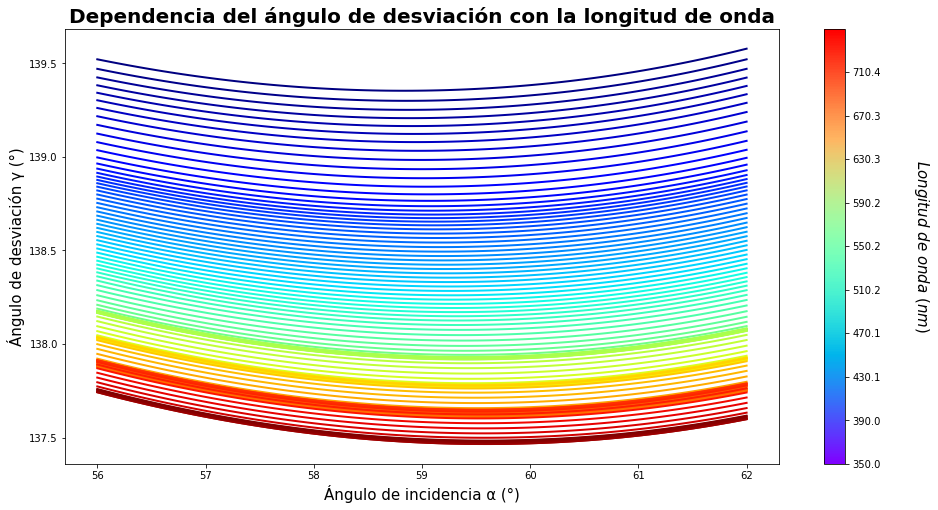

In [5]:
index = {}
i = 0

with open('indice.csv','r') as indice:
    reader = csv.reader(indice)
    
    
    for row in reader:
        if len(row) == 0:
            break
        if (i!=0):    
            #print(row)
            index[float(row[0])*1000] = float(row[1])
        i+=1
tck1 = interpolate.splrep(list(index.keys()),list(index.values()),s=0)

def deviation_alpha(n,alpha):
    gamma = 180 + 2*alpha-4*numpy.degrees(numpy.arcsin(1/n*numpy.sin(numpy.radians(alpha))))
    return gamma

def plot2_func():
    wl_range=numpy.linspace(350,750,100)
    
        
    interpolated_n = interpolate.splev(wl_range,tck1,der=0)
    alpha_range = numpy.linspace(56,62,100)
    
    plot_data=numpy.vstack((alpha_range,deviation_alpha(interpolated_n,alpha_range)))
    
    #print(min_alpha.x)
    fig = plt.figure(figsize=(8,8))
    colormap = plt.cm.rainbow
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(numpy.linspace(0, 1, 100))))    
    
    levels = numpy.linspace(350,750,1000,endpoint=True)
    Z = [[0,0],[0,0]]
    CS3=plt.contourf(Z,levels,cmap=colormap)
    plt.clf()
    
    fig = plt.figure(figsize=(16,8))
    colormap = plt.cm.rainbow
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(numpy.linspace(0, 1, 100))))    
    
    for i in range(100):
        pos = plt.plot(alpha_range,deviation_alpha(interpolated_n[i],alpha_range),linewidth=2);
        #labels.append(r'$n = %f$' % interpolated_n[i])
    #plt.plot(alpha_range,deviation_alpha(interpolated_n,alpha_range))
    #plt.pcolor(X,Y,Z)
    #f = plt.colorbar.ColorbarBase()
    plt.xlabel("Ángulo de incidencia α (°)",fontsize = 15)
    plt.ylabel("Ángulo de desviación γ (°)",fontsize = 15)
    #plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: "+str(interpolated_n), horizontalalignment='center')
    plt.title("Dependencia del ángulo de desviación con la longitud de onda",fontsize=20,fontweight='bold')
    #plt.legend(labels,loc='best')
    cbar = plt.colorbar(CS3);
    cbar.set_label("$Longitud \ de \ onda \ (nm)$",fontsize = 15,labelpad=50,rotation=270)
    plt.show()
    fig.savefig('angulodesviacion_d.png')


plot2_func();
plt.close()
#
#plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(numpy.linspace(0, 1, 100))))    
#Z = [[0,0],[0,0]]
#CS3=plt.contourf(Z,levels,cmap=colormap)

In [6]:
def minimal_deviation(wl):
   # wl_range=numpy.linspace(450,750,100)
    interpolated_n = interpolate.splev(wl,tck1,der=0)
    minimum_deviation_alpha_partial = partial(deviation_alpha,interpolated_n)
    #min_alpha = scipy.optimize.broyden1(minimum_deviation_alpha_partial, 60, f_tol=1e-14)  
    min_alpha =scipy.optimize.minimize_scalar(minimum_deviation_alpha_partial)
    display(HTML("<h2 style='padding: 10px'>Valores Numéricos de la desviación</h2><table align='left' width='400' class='table table-striped'> <tbody> <tr> <th > <i>λ (nm)</i> </td> <td>%f</td> </tr> <tr> <th scope='row'> Índice de refracción (n)</th> <td>%f</td>  </tr> <tr> <th scope='row'>Ángulo de desviación mínimo $ α_{min}$(°)</th>  <td>%f</td></tr> <tr> <th>Desviación mínima $D( α_{min})$(°)</th> <td>%f</td> </tr> </tbody> </table>"% (wl, interpolated_n,min_alpha.x,min_alpha.fun)) )

interact(minimal_deviation,wl = widgets.FloatSlider(value=650,
                                               min=350,
                                               max=750,
                                               step=10,
                                               continuous_update=False,
                                               description=r'$\lambda \ (nm)$'));

interactive(children=(FloatSlider(value=650.0, continuous_update=False, description='$\\lambda \\ (nm)$', max=750.0, min=350.0, step=10.0), Output()), _dom_classes=('widget-interact',))

Como era de esperar, ya que sin este efecto no existirñia el arcoiris como lo conocemos, el ángulo de desviación varía con respecto a la longitud de onda. En el apartado anterior vimos como era la dependecia del ángulo de desviacion $D(\alpha)$ en función del ángulo de incidencia $\alpha$ 
$$D(\alpha) = 180º + 2\alpha -4 \arcsin{\left({{n_1}\over{n_2}}\sin{\alpha}\right)}$$
Pero no es el único parametro del que depende, vemos que la desviación tambien depende de la relación entre los indice de refraccción $n_1$ y $n_2$. Teniendo en cuenta que el índice de refracción del aire es aproxiamadamente la unidad, y la dependencia del índice de agua con la longitud de onda, observaremos como para cada longitud de onda el ángulo de desviación es diferente. Este fenómeno, conocido como <i>dispersión de la luz</i>, es el que permite observar cada uno de los dferentes colores en el arco.
<br>
Cabe destacar dos hechos relacionados con la diepsersión: la diferencia de intensidad para ciertas longitudes de onda y el orden en el que son refractados los colores.
Observando la figura en la que se muestra la variación del ángulo de desviación con la longitud de onda, se comprueba la existencia de una mayor concentración de haces luminosos salientes para cieras longitudes de onda cercanas. Con esto podemos explicar por qué el color rojo, por ejemplo, en el arcoiris es mas intenso que los tonos más azulados.
En cuanto a los ángulos para los extremos del espectro visible, se dilucida que el color que sufre una mayor dispersión es el color rojo $\left( \lambda = 700 \ nm \equiv \alpha_{min} \approx 59.53° \rightarrow D(\alpha)_{min} = 137.63 °\right)$, mientras que el que sufre una menor dispersión son longitudes de onda en el entorno del azul y el violeta $\left( \lambda = 400 \ nm \equiv \alpha_{min} \approx 59.06° \rightarrow D(\alpha)_{min} = 138.79 °\right)$.
<br>

Con estos dos últimos valores, podemos determinar algunas caracterizaciones geométricas del arcoiris. Para ello definiremos el ángulo con el que llegan los haces luminosos a un observador que se encuentre en el suelo. Alargando infinítamente el rayo saliente de la gota esferica, podremos identificar que el ángulo para el observador en la tierra corresponde justamente con el ángulo $2 \delta$, el cual viene dado por:
$$2 \delta = 180° - D \left( \alpha \right)$$
Para el observador situado en el suelo, los colores rojos se visualizaran en un angulo entorno a $2\delta_{rojo}  = 42,37° $; mientras que las longitudes correspondientes a los azules, $2 \delta_{azul}  = 41,21°$. Como se comento anteriormente, esto nos da que el color rojo se encuentra en una posición más alta que el azul, y un tamaño angular del arcoiris aproxiamadamente de $\Delta  (2\delta) = 1,16°$

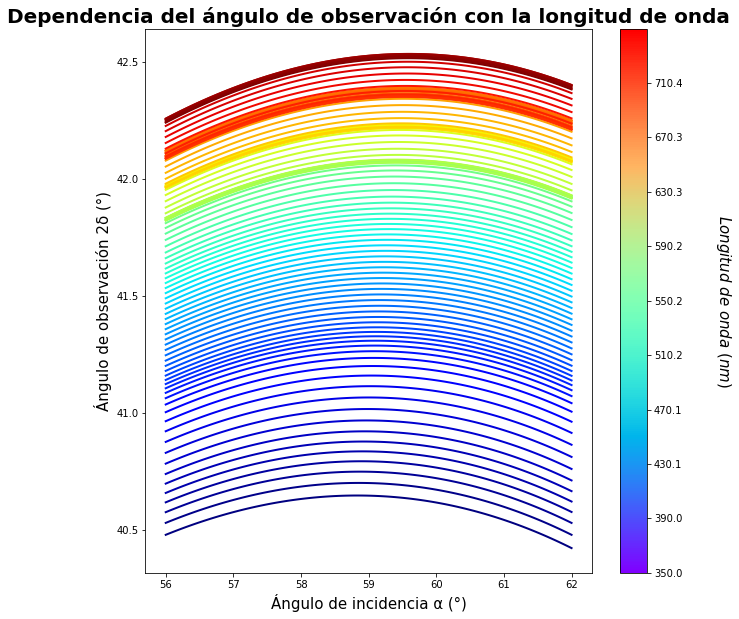

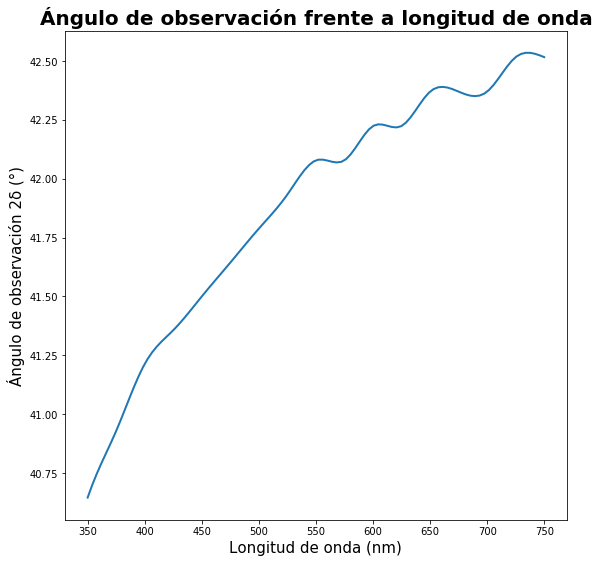

In [7]:
def minimal_deviation2(wl):
   # wl_range=numpy.linspace(450,750,100)
    
    #min_alpha = scipy.optimize.broyden1(minimum_deviation_alpha_partial, 60, f_tol=1e-14)
    min_alpha = []
    for i in range(len(wl)):
        interpolated_n = interpolate.splev(wl[i],tck1,der=0)
        minimum_deviation_alpha_partial = partial(deviation_alpha,interpolated_n)
        min_alpha.append(scipy.optimize.minimize_scalar(minimum_deviation_alpha_partial).x)
    return numpy.asanyarray(min_alpha)

def plot3_func():
    wl_range=numpy.linspace(350,750,100)
    
        
    interpolated_n = interpolate.splev(wl_range,tck1,der=0)
    alpha_range = numpy.linspace(56,62,100)
    
   
    #print(min_alpha.x)
    fig = plt.figure(figsize=(8,8))
    colormap = plt.cm.rainbow
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(numpy.linspace(0, 1, 100))))    
    
    levels = numpy.linspace(350,750,1000,endpoint=True)
    Z = [[0,0],[0,0]]
    CS3=plt.contourf(Z,levels,cmap=colormap)
    plt.clf()
    
    fig = plt.figure(figsize=(10,10))
    colormap = plt.cm.rainbow
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(numpy.linspace(0, 1, 100))))    
    
    for i in range(100):
        pos = plt.plot(alpha_range,180-deviation_alpha(interpolated_n[i],alpha_range),linewidth=2);
        #labels.append(r'$n = %f$' % interpolated_n[i])
    #plt.plot(alpha_range,deviation_alpha(interpolated_n,alpha_range))
    #plt.pcolor(X,Y,Z)
    #f = plt.colorbar.ColorbarBase()
    plt.xlabel("Ángulo de incidencia α (°)",fontsize = 15)
    plt.ylabel("Ángulo de observación 2δ (°)",fontsize = 15)
    #plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: "+str(interpolated_n), horizontalalignment='center')
    plt.title("Dependencia del ángulo de observación con la longitud de onda",fontsize=20,fontweight='bold')
    #plt.legend(labels,loc='best')
    cbar = plt.colorbar(CS3);
    cbar.set_label("$Longitud \ de \ onda \ (nm)$",fontsize = 15,labelpad=50,rotation=270)
    plt.show();
    plt.close();
     
    fig = plt.figure(figsize=(9,9))
    plt.plot(wl_range,180-deviation_alpha(interpolated_n,minimal_deviation2(wl_range)),linewidth=2)
    plt.xlabel("Longitud de onda (nm)",fontsize = 15)
    plt.ylabel("Ángulo de observación 2δ (°)",fontsize = 15)
    #plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: "+str(interpolated_n), horizontalalignment='center')
    plt.title("Ángulo de observación frente a longitud de onda",fontsize=20,fontweight='bold')
    plt.show();
    
plot3_func();
plt.close()

<h3> Arco Secundario </h3>

El arco secundario es el resultante de una doble reflexión en el interior de las gotas de agua. Este segundo arco tiene una serie de cuestiones que lo diferencian y que veremos a continuación. En primer lugar mostraremos el esquema de rayos al igual que para el primer caso, y siguiendo el mismo patrón de colores: <br> <img src=rayos2.png>

<br>

Siendo el ángulo $\alpha$ tanto el ángulo de incidencia como el ángulo de salida del haz luminoso en la gota, $\beta$ vendrá dado por la ley de la refracción de Snell $\beta=\arcsin \left(\frac{n_1}{n_2}\sin(\alpha)\right)$. El ángulo $\epsilon$ se obtiene facilmente sabiendo que losángulos de un triángulo suman 180 grados, y que cada reflexioón corresponde con $2 \beta$, por lo tanto $\epsilon = 180°-2\beta-2\beta = 180° - 4\beta$. Por último el ángulo de desviación $\delta$ se obtiene trivialmente como $\delta  = \alpha -\beta + \alpha - \beta +180° - 4\beta = 180°+2\alpha-6\beta$. Por último, y aunque no se encuentre explicitamente dibujado, conviene definir el ángulo suplementario a $\delta$ como $\gamma = 180°-\delta$. Este último ángulo es el que usaremos como desviación del haz emergente respecto del incidente $D(\alpha) = \gamma$

In [48]:
def deviation_second(n,alpha):
    gamma = 360-2*alpha+6*numpy.degrees(numpy.arcsin((1/n)*numpy.sin(numpy.radians(alpha))))
    return gamma

def data_control(wl):
    alpha_range=numpy.linspace(-90,90,1000)
    interpolated_n = interpolate.splev(wl,tck1,der=0)
    fig = plt.figure(figsize=(10,10))
    plot_deviation=plt.plot(alpha_range, deviation_second(interpolated_n,alpha_range))
    plt.xlabel("Ángulo de incidencia α (°)",fontsize = 15)
    plt.ylabel("Ángulo de desviación γ (°)",fontsize = 15)
    #plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: n=1.33", horizontalalignment='center')
    plt.title("Ángulo de desviación en gotas con doble reflexión",fontsize=20,fontweight='bold')
    plt.show();
    fig.savefig('desv_secundario.png')
    plt.close();
       # wl_range=numpy.linspace(450,750,100)
    interpolated_n = interpolate.splev(wl,tck1,der=0)
    minimum_deviation_alpha_partial = partial(deviation_second,interpolated_n)
    #min_alpha = scipy.optimize.broyden1(minimum_deviation_alpha_partial, 60, f_tol=1e-14)
    min_alpha = scipy.optimize.minimize_scalar(minimum_deviation_alpha_partial)
    #print(min_alpha)
    min_desviacion=min_alpha.fun
    delta = -180+min_desviacion
    display(HTML("<h2 style='padding: 10px'>Valores Numéricos de la desviación</h2><table align='center' class='table table-striped'> <tbody> <tr> <th > <i>λ (nm)</i> </td> <td>%f</td> </tr> <tr> <th scope='row'> Índice de refracción (n)</th> <td>%f</td>  </tr> <tr> <th scope='row'>Ángulo de desviación mínimo $α_{min}$(°)</th>  <td>%f</td></tr> <tr> <th>Desviación mínima $D(α_{min})$(°)</th> <td>%f</td> </tr> <tr><th>Ángulo para el observador $\delta (°)$</th> <td>%f</td></tr></tbody> </table>"% (wl, interpolated_n,min_alpha.x,min_desviacion,delta))) 
    
#def minimal_deviation_second(wl):

    
interact(data_control, wl = widgets.FloatSlider(value=650,
                                           min=350,
                                           max=750,
                                           step=20,
                                           continuous_update=False,
                                           description=r'$\lambda \ (nm)$'));
                                          



interactive(children=(FloatSlider(value=650.0, continuous_update=False, description='$\\lambda \\ (nm)$', max=750.0, min=350.0, step=20.0), Output()), _dom_classes=('widget-interact',))

Es importante destacar que el los valores del angulo de incidencia son negativos debido a que los ángulos de incidencia han sido aquellos que se encuentran en la mitad inferior de la gota. 

Dando valores para distintas longitudes de onda, vemos como para los extremos del espectro visible (400-700 $nm$), los ángulos para el observador corresponde con, aproximadamente, $50.36°$ para la longitud de onda de $700 \ nm$, y $52.45°$ para la longitud de $400 \ nm$. Si comparamos estos valores con los obtenidos para el arco primario, obtenemos que este se encuentra por encima, y la posición de los colores se encuentra intercambiada debido a la doble reflexión. El color rojo ahora se encontraría en la posición más baja, mientras que los azules se encontrarían en la parte superior del arco. 
<br> 

En el siguiente gráfico se oobservará con mejor detalle dicho fenómeno.

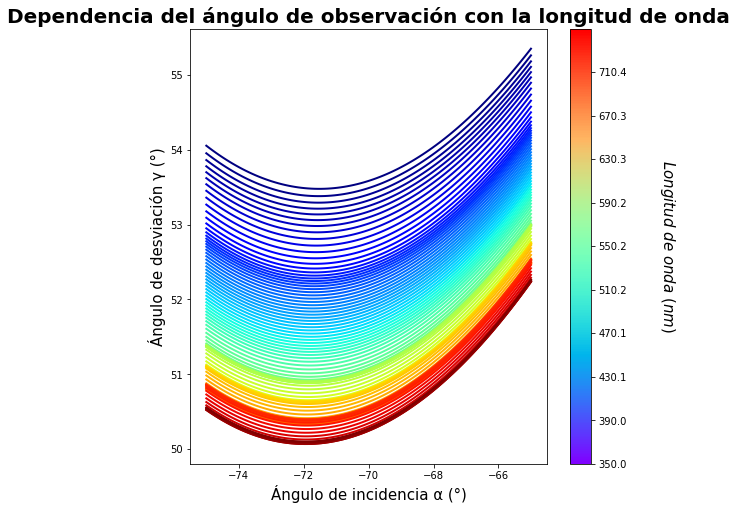

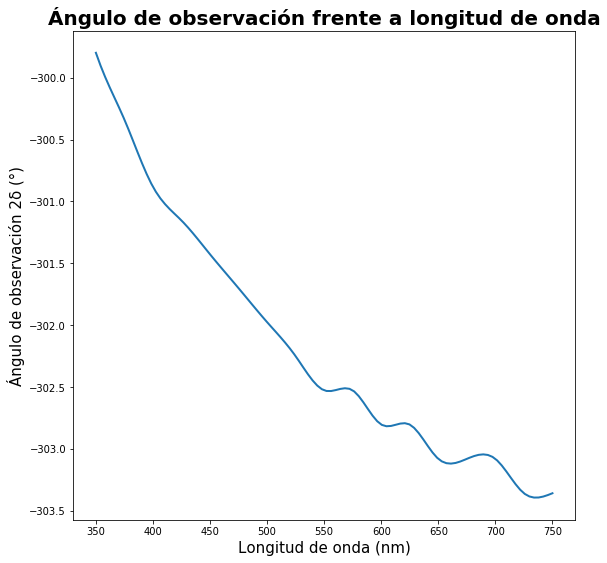

In [9]:
def plot4_func():
    wl_range=numpy.linspace(350,750,100)
    
        
    interpolated_n = interpolate.splev(wl_range,tck1,der=0)
    alpha_range = numpy.linspace(-65,-75,100)
       
    #print(min_alpha.x)
    fig = plt.figure(figsize=(20,16));
    colormap = plt.cm.rainbow;
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(numpy.linspace(0, 1, 100))));
    
    levels = numpy.linspace(350,750,1000,endpoint=True)
    Z = [[0,0],[0,0]]
    CS3=plt.contourf(Z,levels,cmap=colormap);
    plt.clf();
    
    fig = plt.figure(figsize=(8,8));
    colormap = plt.cm.rainbow
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(numpy.linspace(0, 1, 100))))    
    
    for i in range(100):
        pos = plt.plot(alpha_range,-180+deviation_second(interpolated_n[i],alpha_range),linewidth=2);
        #labels.append(r'$n = %f$' % interpolated_n[i])
    #plt.plot(alpha_range,deviation_alpha(interpolated_n,alpha_range))
    #plt.pcolor(X,Y,Z)
    #f = plt.colorbar.ColorbarBase()
    plt.xlabel("Ángulo de incidencia α (°)",fontsize = 15)
    plt.ylabel("Ángulo de desviación γ (°)",fontsize = 15)
    #plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: "+str(interpolated_n), horizontalalignment='center')
    plt.title("Dependencia del ángulo de observación con la longitud de onda",fontsize=20,fontweight='bold')
    #plt.legend(labels,loc='best')
    cbar = plt.colorbar(CS3);
    cbar.set_label("$Longitud \ de \ onda \ (nm)$",fontsize = 15,labelpad=50,rotation=270)
    plt.show();
    plt.close();
    
    fig = plt.figure(figsize=(9,9))
    plt.plot(wl_range,180-deviation_second(interpolated_n,minimal_deviation2(wl_range)),linewidth=2)
    plt.xlabel("Longitud de onda (nm)",fontsize = 15)
    plt.ylabel("Ángulo de observación 2δ (°)",fontsize = 15)
    #plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: "+str(interpolated_n), horizontalalignment='center')
    plt.title("Ángulo de observación frente a longitud de onda",fontsize=20,fontweight='bold')
    plt.show();
    plt.close();

plot4_func();

Como era de esperar, el ángulo de desviación en los colores azules es mayor que en los rojos, lo que provocará que los colores en el arco secundario estén en posiciones invertidas respecto a las del arco primario. Este segundo arco además posee un mayor tamaño angular $\delta_{azul}-\delta_{rojo}  \approx 2.09°$ en comporación con los $0.87°$ del primario. Sin embargo, a pesar tener mayor tamaño angular, la intensidad de este sera considerablemente menor debido una cantidad de intensidad transmitida extra en la segunda reflexión.

<h3> Ecuaciones de fresnel y polariación </h3>

<h4> Arco primario </h4>

In [47]:
def polarization_plot(wl):
    n1 = 1
    n2 = interpolate.splev(wl,tck1,der=0)
    alpha_range = numpy.linspace(0,90,100)
    f1 = coefficients(n1,n2,numpy.radians(alpha_range))
    f2 = coefficients(n2,n1,numpy.arcsin(n1/n2*numpy.sin(numpy.radians(alpha_range))))
    f3 = coefficients(n2,n1,numpy.arcsin(n1/n2*numpy.sin(numpy.radians(alpha_range))))
    
    I_p_sal = f1['T_p']*f2['R_p']*f3['T_p']
    I_s_sal = f1['T_s']*f2['R_s']*f3['T_s']
    
    display(HTML("<h2 style='padding: 10px'>Valores Numéricos del flujo energético saliente</h2><table align='center' class='table table-striped'> <tbody> <tr> <th > <i>λ (nm)</i> </td> <td>%f</td> </tr> <tr> <th scope='row'> Índice de refracción (n)</th> <td>%f</td>  </tr> <tr> <th scope='row'>Fracción de flujo energético saliente perpendicular</th>  <td>%f</td></tr> <tr> <th>Fracción de flujo energético saliente paralelo</th> <td>%f</td> </tr> </tbody> </table>"% (wl, n2,I_s_sal[67],I_p_sal[67]))) 

    fig = plt.figure(figsize = (9,9))
    plt.plot(alpha_range,(I_p_sal*100),label='Paralelo')
    plt.plot(alpha_range, I_s_sal*100,label='Perpendicular')
    plt.ylabel("Porcentaje de flujo de energía saliente (%)",fontsize = 15)
    plt.title("Flujos de energía saliente",fontsize=20,fontweight='bold')
    plt.xlabel("Ángulo de incidencia (º)",fontsize = 15)
    plt.legend();
    plt.show();
    
    fig2 = plt.figure(figsize = (9,9))
    plt.plot(alpha_range,((I_s_sal*100-I_p_sal*100)/(I_p_sal*100+I_s_sal*100)))
    plt.ylabel("Porcentaje de polarización perpendicular",fontsize = 15)
    plt.xlabel("Ángulo de incidencia (º)",fontsize = 15)
    #plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: "+str(interpolated_n), horizontalalignment='center'
    plt.title("Polarización perpenducular",fontsize=20,fontweight='bold')
    plt.show();
    plt.close();
    
interact(polarization_plot, wl = widgets.FloatSlider(value=600,
                                               min=350,
                                               max=750,
                                               step=10,
                                               continuous_update=False,))

interactive(children=(FloatSlider(value=600.0, continuous_update=False, description='wl', max=750.0, min=350.0, step=10.0), Output()), _dom_classes=('widget-interact',))

<function __main__.polarization_plot>

<h4> Arco secundario </h4>

In [46]:

def polarization_plot(wl):
    n1 = 1
    n2 = interpolate.splev(wl,tck1,der=0)
    alpha_range = numpy.linspace(-90,0,100)
    f1 = coefficients(n1,n2,numpy.radians(alpha_range))
    f2 = coefficients(n2,n1,numpy.arcsin(n1/n2*numpy.sin(numpy.radians(alpha_range))))
    f3 = coefficients(n2,n1,numpy.arcsin(n1/n2*numpy.sin(numpy.radians(alpha_range))))
    f4 = coefficients(n2,n1,numpy.arcsin(n1/n2*numpy.sin(numpy.radians(alpha_range))))

    I_p_sal = f1['T_p']*f2['R_p']*f3['R_p']*f4['T_p']
    I_s_sal = f1['T_s']*f2['R_s']*f3['R_s']*f4['T_s']

    display(HTML("<h2 style='padding: 10px'>Valores Numéricos del flujo energético saliente</h2><table align='center' class='table table-striped'> <tbody> <tr> <th > <i>λ (nm)</i> </td> <td>%f</td> </tr> <tr> <th scope='row'> Índice de refracción (n)</th> <td>%f</td>  </tr> <tr> <th scope='row'>Fracción de flujo energético saliente perpendicular</th>  <td>%f</td></tr> <tr> <th>Fracción de flujo energético saliente paralelo</th> <td>%f</td> </tr> </tbody> </table>"% (wl, n2,I_s_sal[20],I_p_sal[20]))) 

    
    fig = plt.figure(figsize = (9,9))
    plt.plot(alpha_range,(I_p_sal*100),label='Paralelo')
    plt.plot(alpha_range, I_s_sal*100,label='Perpendicular')
    plt.ylabel("Porcentaje de flujo de energía saliente",fontsize = 15)
    plt.title("Flujos de energía saliente",fontsize=20,fontweight='bold')
    plt.xlabel("Ángulo de incidencia (º)",fontsize = 15)
    plt.legend();
    plt.show();
    
    fig2 = plt.figure(figsize = (9,9))
    plt.plot(alpha_range,((I_s_sal*100-I_p_sal*100)/(I_p_sal*100+I_s_sal*100)))
    plt.ylabel("Porcentaje de polarización perpendicular",fontsize = 15)
    plt.xlabel("Ángulo de incidencia (º)",fontsize = 15)
    #plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: "+str(interpolated_n), horizontalalignment='center'
    plt.title("Polarización perpenducular",fontsize=20,fontweight='bold')
    plt.show();
    plt.close();
    
interact(polarization_plot, wl = widgets.FloatSlider(value=600,
                                               min=350,
                                               max=750,
                                               step=10,
                                               continuous_update=False,))

interactive(children=(FloatSlider(value=600.0, continuous_update=False, description='wl', max=750.0, min=350.0, step=10.0), Output()), _dom_classes=('widget-interact',))

<function __main__.polarization_plot>

In [14]:
################################################
# Ignorar. Script para ocultar celdas de codigo#
################################################
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
    $('div.input').hide();
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
   
 } else {
    $('div.input').show();
    $('div.prompt').show();
    $('div.back-to-top').show();
    $('nav#menubar').show();
    $('.breadcrumb').show();
    $('.hidden-print').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')